<a href="https://colab.research.google.com/github/aashish3808/generative-ai-for-beginners/blob/main/Proj_03_Convolutional_NN_Fashion_Dataset_shell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


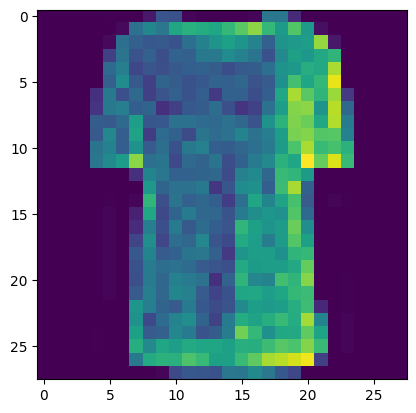

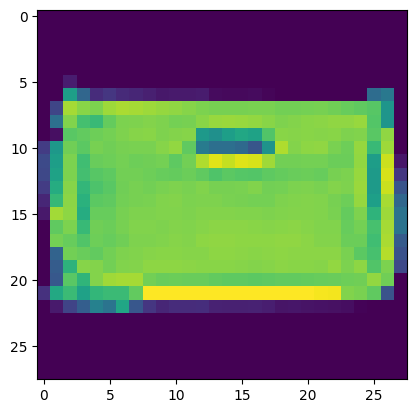

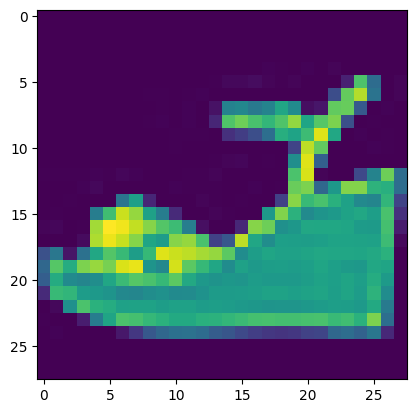

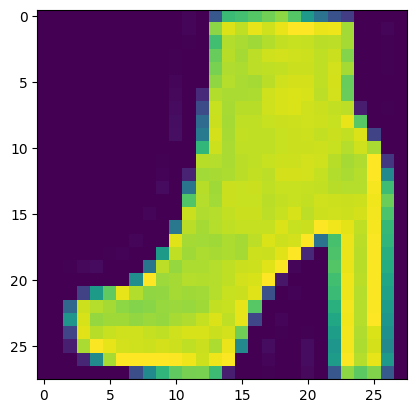

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
  86/1875 ━━━━━━━━━━━━━━━━━━━━ 5:49 195ms/step - accuracy: 0.5575 - loss: 11.8090

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
nc = 10 # Number of classes


(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

#Show sample images

plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()


#Write code here
Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=3)

ypred = model.predict(Xtest)
ypred = np.argmax(ypred, axis=1)

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()